In [535]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

### No popularity:
We will use the data unweighted by feature importances for popularity to do analysis with k-NN and k-means.

## k-NN

In [761]:
data = pd.read_csv("nopopdata.csv")

In [762]:
genres = data.columns[24:363]
artists = data.columns[363:-3]

In [765]:
data

,version https://git-lfs.github.com/spec/v1
0,oid sha256:80770f6ab6c03af8486612958d0240bc1b3...
1,size 1168730111


In [763]:
nopopdata = data[['id', 'name', 'artist', 'danceability',
                  'energy', 'speechiness', 'acousticness',
                  'instrumentalness', 'liveness', 'valence', 'tempo']].copy()
ids = nopopdata[['id','name','artist']]
nopopdata = nopopdata.drop(columns=['id','name','artist'])

KeyError: "None of [Index(['id', 'name', 'artist', 'danceability', 'energy', 'speechiness',\n       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],\n      dtype='object')] are in the [columns]"

To choose k, we are going to use every row in the dataset as a test point, find the nearest 200 neighbors, and get the average distance of each kth nearest neighbor. If there is a sharp dropoff in distance, we will choose that k.

In [764]:
neigh = NearestNeighbors(n_neighbors=500).fit(nopopdata)
dists = []
for i, row in nopopdata.iterrows():
    nearest = neigh.kneighbors([list(row)], 500)
    dists.append(nearest[0].flatten())

/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  

/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  

/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  

/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  

/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  

/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  

/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  

/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  

/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  

/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  

/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  

/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  

/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  

/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  

/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  

/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  

/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  

/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  

/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  

/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  

/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  

/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  

/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  

/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/benjaminpolson/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  

KeyboardInterrupt: 

In [716]:
dists = np.array(dists)
means = dists.mean(axis=0)[1:]
k = np.arange(1,500)

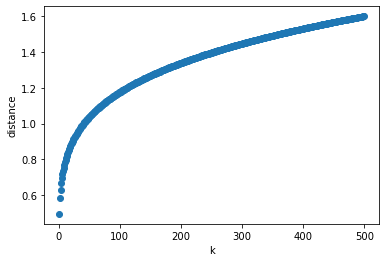

In [717]:
plt.scatter(k, means)
plt.xlabel('k')
plt.ylabel('distance')
plt.show()

Based on the above plot, it looks like the slope starts to rapidly decrease between k=50 and k=100. Since providing more than 50 songs would be a lot of songs to listen to, we will use k=50.

## k-means

Because the data set is large, we will use mini-batch k-means as it is much faster than traditional k-means.

In [718]:
dists = []
ks = list(range(10, 401, 10))
for k in ks:
    clust = MiniBatchKMeans(n_clusters = k).fit(nopopdata)
    dists.append(clust.inertia_)

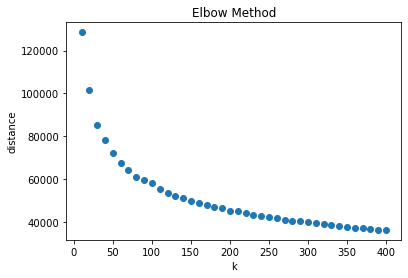

In [719]:
plt.scatter(ks, dists)
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('distance')
plt.show()

In [760]:
diffs = np.abs(np.array(dists[1:]) - np.array(dists[:-1]))
props = np.array(diffs[1:])/np.array(diffs[:-1])
plt.scatter(ks[1:], (np.ones(len(props)) - props)*100)
plt.xlabel('k')
plt.ylabel('percent decrease in distance')
plt.show()

ValueError: operands could not be broadcast together with shapes (37001,) (37001,10) 

Since it is difficult to spot the elbow in the sum of squared distances to centroids, we also plotted the percent decrease in sum of squared distances to centroids from one value of k to the next. From those points, it is more obvious that it is around k = 80. To further narrow down k, we will use the silhouette method from k = 75 to k = 85. Since we are allowing the user to say they don't care about particular features, need to automate this process. Therefore, we will choose the first k value (to the nearest 10) where the percent decrease is 5% or below.

In [723]:
sil = []
ks = list(range(75, 86))
for k in ks:
    clust = MiniBatchKMeans(n_clusters = k).fit(nopopdata)
    sil.append(silhouette_score(nopopdata, clust.labels_, metric = 'euclidean'))

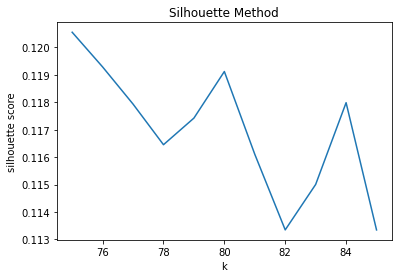

In [724]:
plt.plot(ks, sil)
plt.title('Silhouette Method')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.show()

To narrow down k further, we will choose the k with the max silhouette score from k - 5 to k + 5. Since the highest silhouette score is highest at k = 75, we will use 75 clusters.

In [725]:
clust = MiniBatchKMeans(n_clusters = 75).fit(nopopdata)
labs = clust.labels_
centr = clust.cluster_centers_

In [726]:
neigh = NearestNeighbors(n_neighbors=10).fit(centr)
dists = []
for i, row in nopopdata.iterrows():
    nearest = neigh.kneighbors([list(row)], 10)
    dists.append(nearest[0].flatten())

In [727]:
dists = np.array(dists)
means = dists.mean(axis=0)
k = np.arange(1,11)

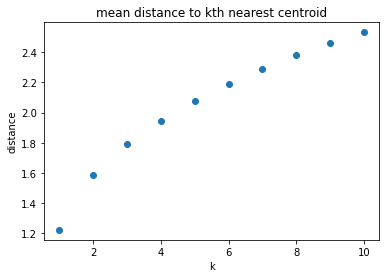

In [728]:
plt.scatter(k, means)
plt.xlabel('k')
plt.ylabel('distance')
plt.title('mean distance to kth nearest centroid')
plt.show()

In [729]:
from collections import Counter
labs = list(labs)
d = Counter(labs)

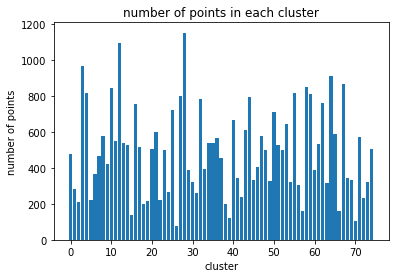

In [730]:
plt.bar(d.keys(), d.values())
plt.xlabel('cluster')
plt.ylabel('number of points')
plt.title('number of points in each cluster')
plt.show()

In [731]:
min(d.values())

78

Since there are at least 78 points in each cluster and the mean distance to the kth nearest centroid drastically increases from k=1 to k=2, we will use just the nearest centroid to the user's input and draw songs from that cluster.

### Popularity:

In [749]:
popdata = pd.read_csv('popdata.csv')
feat_importance = pd.read_csv('feat_importance.csv')

In [751]:
feat_importance.head()

,Unnamed: 0,feature,importance,positive
0,0,alb_release_date,0.103207,1
1,1,alb_total_tracks,0.145780,0
2,2,disc_number,0.004013,0
3,3,track_number,0.087790,0
4,4,explicit,0.000135,1


Before adding popularity as an option to the app, we will need to figure out how to choose feature values to maximize popularity. This is outside the scope of what we learned, and we plan on continuing this project after submitting it.

## App

In [744]:
# Source of audio feature descriptions: Spotify's developer blog

def search_add(lst, results, i, prev_matches):
    """ Helper for search. """
    matches = list(filter(lambda s: i in s.lower(), lst))
    if matches != []:
        if i == 'all':
            results = results.union(set(prev_matches))
            print("They were selected.\n\nAdd more if you'd like or press 'enter' to continue")
        elif len(matches) == 1:
            results.add(matches[0])
            print('\n' + matches[0] + f" was selected \n\nAdd more if you\'d like or press 'enter' to continue")
        elif len(matches) > 1 and i in matches:
            results.add(i)
            print('\n' + i + f' was selected \nSelect more if you\'d like or press \'enter\' to continue\nType "all" to select all. Other results for {i}:')
            print()
            matches.remove(i)
            prev_matches = matches
            for m in matches:
                print(m)
        else:
            prev_matches = matches
            for m in matches:
                print(m)
            print('\nChoose one, or type "all" to choose all')
    else:
        print('No matches. Try again ')
    return results, prev_matches


def search(lst):
    """ Returns a list of elements of the input list that the user searches for. """
    prev_matches = []
    lst = list(map(lambda s: s.lower(), lst))
    results = set()
    while True:
        i = input().lower()
        if i == '':
            return results
        else:
            add_results, prev_matches = search_add(lst, results, i, prev_matches)
            results = results.union(add_results)

            
def popularity():
    """ Returns whether or not the user cares about popularity. """
    error = True
    print('\nAll possible songs that could be selected are fairly popular,\nbut if you would like to have artists and genres chosen for you\nbased on song popularity, type "yes". If you want to provide more\npreferences and ignore popularity, type "no".')
    while error:
        pop = input()
        if pop == 'yes':
            pop = True
            error = False
        elif pop == 'no':
            pop = False
            error = False
        else:
            print('Please type "yes" or "no"')
    return pop


def explicit(data):
    """ Returns the data modified after the user chooses if they care about explicitness. """
    error = True
    print('\nIf you don\'t want songs with explicit lyrics, type "yes"; if you don\'t care, type "no"')
    while error:
        e = input()
        if e == 'yes':
            data = data[data['explicit'] == 0]
            error = False
        elif e == 'no':
            error = False
        else:
            print('Please type "yes" or "no"')
    data = data.drop(columns=['explicit'])
    return data


def dates(data):
    """ Returns the data modified to fit the user's preferences on years. """
    print("Please type the start year, press 'enter', then do the same for end year.\nFor example, if you want to only see music from the 80s and 90s, type 1980 then 1999.\nStart year must be at least 1965 and end year must be at most 2021.\nIf you don't have a preference, just press 'enter'.")
    error = True
    while error:
        start = input('Start: ')
        if start == '':
            return data
        elif start.isdigit() and 2021 >= int(start) >= 1965:
            start_unix = datetime.fromisoformat(start+'-01-01#00:00:00').timestamp()
            error = False
        else:
            print('Please enter a valid start date')
            
    error = True
    while error:
        end = input('End: ')
        if end.isdigit() and 2021 >= int(end) >= 1965 and int(end) >= int(start):
            end_unix = datetime.fromisoformat(end+'-12-31#23:59:59').timestamp()
            error = False
        else:
            print('Please enter a valid end date')
    maxi = 1634875200
    mini = -128718000
    start_unix = (start_unix - mini) / (maxi - mini)
    end_unix = (end_unix - mini) / (maxi - mini)
    
    data = data[data['alb_release_date'] >= start_unix]
    data = data[data['alb_release_date'] <= end_unix]
    data = data.drop(columns=['alb_release_date'])
    return data

def pref(data, feature, text):
    print(text)
    while True:
        i = input()
        if i == '':
            return None
        elif feature == 'instrumentalness' and i.isdigit() and (int(i) == 0 or int(i) == 1):
            return int(i)*100
        elif feature != 'instrumentalness' and i.isdigit() and int(i) in list(range(11)):
            return int(i)*10
        else:
            print('Invalid entry. Please try again')

            
def elbow(data):
    """ Returns the best k to the nearest 10 using the Elbow Method. """
    dists = []
    ks = list(range(10, 201, 10))
    for k in ks:
        clust = MiniBatchKMeans(n_clusters = k).fit(nopopdata)
        dists.append(clust.inertia_)
    props = np.array(dists[1:])/np.array(dists[:-1]) # calculate percent changes
    props = np.ones(len(props)) - props
    k10ind = np.where(props < 0.05)[0][0]
    return ks[k10ind+1]
    
    
def silhouette(data, k):
    """ Returns the best k using the Silhouette Method. """
    sil = []
    ks = list(range(k-5, k+6))
    for k in ks:
        clust = MiniBatchKMeans(n_clusters = k).fit(nopopdata)
        sil.append(silhouette_score(nopopdata, clust.labels_, metric = 'euclidean'))
    maxi = max(sil)
    ind = sil.index(maxi)
    return ks[ind]


def pick_cluster(data, ids, k, clust, pref):
    labs = clust.labels_
    centr = clust.cluster_centers_
    neigh = NearestNeighbors(n_neighbors=1).fit(centr)
    nearest = neigh.kneighbors([pref], 1)[1].flatten()[0]
    labs = np.where(labs == nearest)
    return ids.iloc[labs]


def app(mode='k-nn'):
    """ Runs the app. Parameter mode can either be 'k-means' or 'k-nn'. Default is 'k-nn' """
    newdata = data.copy()
    print("Welcome to the Spotify song selector! To have a personalized song list,\nanswer the following questions.")
    input('Press enter to continue.')
    pop = popularity()
    print("\nIf you hate specific genres, search them below. \nPress 'enter' when you are finished.")
    remove_g = search(genres)
    print("If you hate specific artists, search them below. \nPress 'enter' when you are finished.")
    remove_a = search(artists)
    for g in remove_g:
        newdata = newdata[newdata[g] == 0]
    for a in remove_a:
        newdata = newdata[newdata[a] == 0]
    newdata = newdata.drop(columns = list(remove_g) + list(remove_a))
    newdata = explicit(newdata)
    newdata = dates(newdata)
    
    # no popularity
    if not pop:
        nopopdata = data[['id', 'name', 'artist', 'danceability',
                  'energy', 'speechiness', 'acousticness',
                  'instrumentalness', 'liveness', 'valence', 'tempo']].copy()
        ids = nopopdata[['id','name','artist']]
        nopopdata = nopopdata.drop(columns=['id','name','artist'])
        
        print("For each of the following metrics, choose a number between 0 and 10.\nIf you don't care about this metric, just press 'enter'")
        prefs = []
        prefs.append(pref(nopopdata, 'danceability', 'Danceability: Describes how suitable a song is for dancing.\nThe higher you choose, the more danceable the songs.'))
        prefs.append(pref(nopopdata, 'energy', 'Energy: Represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.'))
        prefs.append(pref(nopopdata, 'speechiness', 'Speechiness: Detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 10 the attribute value. Values 7 or above are hardly songs and mostly speakign. Values between 3 and 6 describe songs that may contain both music and speech, like rap. Values below 3 are other music.'))
        prefs.append(pref(nopopdata, 'acousticness', 'Acousticness: A confidence measure of whether the song is acoustic.\n10 represents high confidence the track is acoustic.\nAcousticness is when there is no electronic amplification or modification.'))
        prefs.append(pref(nopopdata, 'instrumentalness', 'Instrumentalness: Predicts whether a song contains no vocals. Rap or spoken word tracks are clearly “vocal.” For this one, choose "0" if you want more songs with lyrics or "1" if you want mostly only instrumental songs.'))
        prefs.append(pref(nopopdata, 'liveness', 'Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 8 provides strong likelihood that the track is live.'))
        prefs.append(pref(nopopdata, 'valence', 'Valence: A measure describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).'))
        prefs.append(pref(nopopdata, 'tempo', 'Tempo: The speed or pace of a given piece.'))
        metrics = ['danceability', 'energy', 'speechiness', 'acousticness',
                  'instrumentalness', 'liveness', 'valence', 'tempo']
        for i in range(len(prefs)):
            if prefs[i] is None:
                nopopdata = nopopdata.drop(columns=[metrics[i]])
            else:
                prefs[i] = np.percentile(nopopdata[metrics[i]], prefs[i])
                
        prefs = list(filter(lambda x: x is not None, prefs))

        if mode == 'k-nn':
            neigh = NearestNeighbors(n_neighbors=50).fit(nopopdata)
            nearest = neigh.kneighbors([prefs], 50)
            return ids.iloc[nearest[1].flatten()]
        
        else: # k-means
            k10 = elbow(nopopdata)
            k = silhouette(nopopdata, k10)
            clust = MiniBatchKMeans(n_clusters = k).fit(nopopdata)
            finaldata = pick_cluster(nopopdata, ids, k, clust, prefs)
            return ids.sample(50)
        
    else: # popularity
        popdata = popdata[['id', 'name', 'artist'] + list(feat_importance['feature'])].copy()
        ids = nopopdata[['id','name','artist']]
        nopopdata = nopopdata.drop(columns=['id','name','artist'])
        
        print("For each of the following metrics, choose a number between 0 and 10.\nIf you don't care about this metric, just press 'enter'")
        prefs = []
        prefs.append(pref(nopopdata, 'danceability', 'Danceability: Describes how suitable a song is for dancing.\nThe higher you choose, the more danceable the songs.'))
        prefs.append(pref(nopopdata, 'energy', 'Energy: Represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.'))
        prefs.append(pref(nopopdata, 'speechiness', 'Speechiness: Detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 10 the attribute value. Values 7 or above are hardly songs and mostly speakign. Values between 3 and 6 describe songs that may contain both music and speech, like rap. Values below 3 are other music.'))
        prefs.append(pref(nopopdata, 'acousticness', 'Acousticness: A confidence measure of whether the song is acoustic.\n10 represents high confidence the track is acoustic.\nAcousticness is when there is no electronic amplification or modification.'))
        prefs.append(pref(nopopdata, 'instrumentalness', 'Instrumentalness: Predicts whether a song contains no vocals. Rap or spoken word tracks are clearly “vocal.” For this one, choose "0" if you want more songs with lyrics or "1" if you want mostly only instrumental songs.'))
        prefs.append(pref(nopopdata, 'liveness', 'Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 8 provides strong likelihood that the track is live.'))
        prefs.append(pref(nopopdata, 'valence', 'Valence: A measure describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).'))
        prefs.append(pref(nopopdata, 'tempo', 'Tempo: The speed or pace of a given piece.'))
        metrics = ['danceability', 'energy', 'speechiness', 'acousticness',
                  'instrumentalness', 'liveness', 'valence', 'tempo']
        for i in range(len(prefs)):
            if prefs[i] is None:
                nopopdata = nopopdata.drop(columns=[metrics[i]])
            else:
                prefs[i] = np.percentile(nopopdata[metrics[i]], prefs[i])
                
        prefs = list(filter(lambda x: x is not None, prefs))

        if mode == 'k-nn':
            neigh = NearestNeighbors(n_neighbors=50).fit(nopopdata)
            nearest = neigh.kneighbors([prefs], 50)
            return ids.iloc[nearest[1].flatten()]
        
        else: # k-means
            k10 = elbow(nopopdata)
            k = silhouette(nopopdata, k10)
            clust = MiniBatchKMeans(n_clusters = k).fit(nopopdata)
            finaldata = pick_cluster(nopopdata, ids, k, clust, prefs)
            return ids.sample(50)

    
    
    return newdata

In [745]:
recommendations = app('k-means')

Welcome to the Spotify song selector! To have a personalized song list,
answer the following questions.
Press enter to continue.

All possible songs that could be selected are fairly popular,
but if you would like to have artists and genres chosen for you
based on song popularity, type "yes". If you want to provide more
preferences and ignore popularity, type "no".
no

If you hate specific genres, search them below. 
Press 'enter' when you are finished.
country

country was selected 
Select more if you'd like or press 'enter' to continue
Type "all" to select all. Other results for country:

contemporary country
outlaw country
country road
modern country rock
country pop
country dawn
texas country
country rock
oklahoma country
country rap
arkansas country
australian country
canadian contemporary country
all
They were selected.

Add more if you'd like or press 'enter' to continue

If you hate specific artists, search them below. 
Press 'enter' when you are finished.
no
slipknot
christian

In [711]:
recommendations.to_csv("recs.csv")